In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

Đọc file:


In [55]:
data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Variables:
+ **Hours Studied**: The total number of hours spent studying by each student.
+ **Previous Scores**: The scores obtained by students in previous tests.
+ **Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No).
+ **Sleep Hours**: The average number of hours of sleep the student had per day.
+ **Sample Question Papers Practiced**: The number of sample question papers the student practiced.

Target Variable:
+ **Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

**I.Processing data**

1. Cleanning data 


In [56]:
data_clean = data.copy()

In [57]:
#Miêu tả số lượng, trung bình, phương sai, độ lêch chuẩn, Q1, Q3, giá trị lớn nhất, giá trị nhỏ nhất, trung vị của các cột
data_clean.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


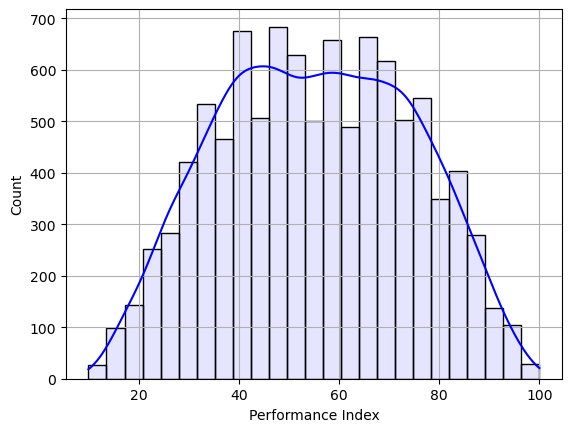

In [58]:
#Vẽ biểu đồ histplot miêu tả sự phân bố dữ liệu của cột selling_price
sns.histplot(data = data_clean, x = "Performance Index", bins=25, color = "blue", kde = True, line_kws = {'color':'red'}, alpha = 0.1)
plt.grid()

In [59]:
#Đếm số phần tử không phải là NaN của mỗi cột
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [60]:
#Tính tổng số phần tử là NaN của mỗi cột
data_clean.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

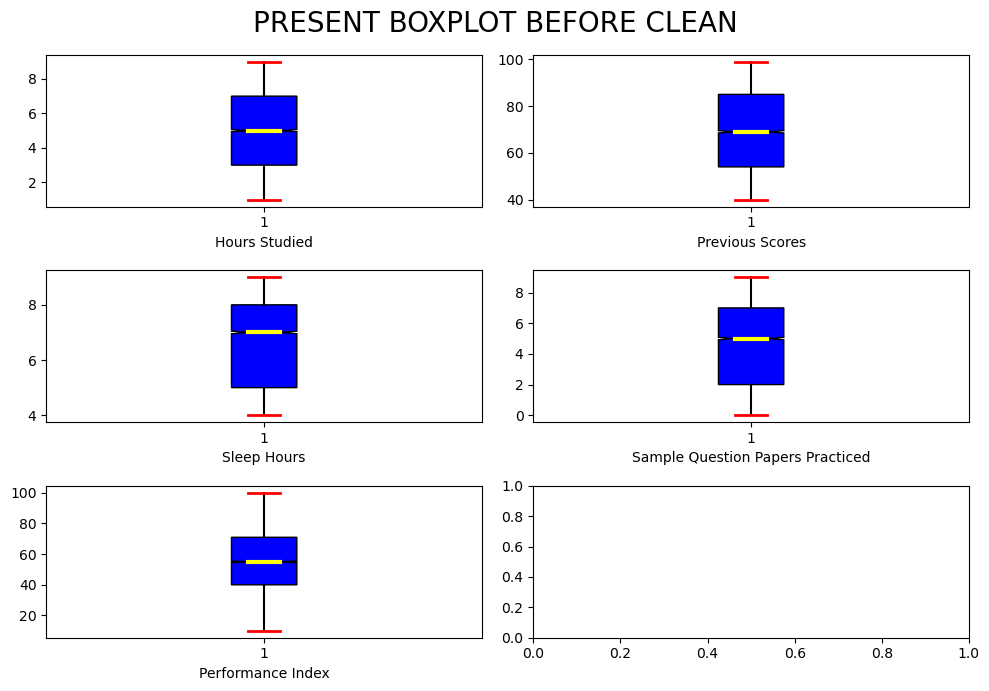

In [61]:
#Vẽ biểu đồ boxplot của các cột
fig, ax = plt.subplots(3, 2, figsize = (10, 7))
bp1 = ax[0, 0].boxplot(data_clean["Hours Studied"], patch_artist = True, notch = True, vert = 1)
bp2 = ax[0, 1].boxplot(data_clean["Previous Scores"], patch_artist = True, notch = True, vert = 1)
bp3 = ax[1, 0].boxplot(data_clean["Sleep Hours"], patch_artist = True, notch = True, vert = 1)
bp4 = ax[1, 1].boxplot(data_clean["Sample Question Papers Practiced"], patch_artist = True, notch = True, vert = 1)
bp5 = ax[2, 0].boxplot(data_clean["Performance Index"], patch_artist = True, notch = True, vert = 1)
colors = ["blue"]
b = [bp1, bp2, bp3, bp4, bp5]
for i in b:
    for patch, color in zip(i["boxes"], colors):
        patch.set_facecolor(color)

for i in b:
    for whisker in i["whiskers"]:
        whisker.set(color = "black", linewidth = 1.5)

for i in b:
    for cap in i["caps"]:
        cap.set(color = "red", linewidth = 2)

for i in b:
    for median in i["medians"]:
        median.set(color = "yellow", linewidth = 3)

ax[0, 0].set_xlabel("Hours Studied")
ax[0, 1].set_xlabel("Previous Scores")
ax[1, 0].set_xlabel("Sleep Hours")
ax[1, 1].set_xlabel("Sample Question Papers Practiced")
ax[2, 0].set_xlabel("Performance Index")
fig.suptitle("PRESENT BOXPLOT BEFORE CLEAN", fontsize = 20)
plt.tight_layout()
plt.show()

In [62]:
#Xóa các outlier của các cột chứa outlier
data_clean = data_clean[data_clean['Hours Studied'] < data_clean['Hours Studied'].quantile(0.99)]
data_clean = data_clean[data_clean['Previous Scores'] < data_clean['Previous Scores'].quantile(0.99)]
data_clean = data_clean[data_clean['Sleep Hours'] < data_clean['Sleep Hours'].quantile(0.99)]
data_clean = data_clean[data_clean['Sample Question Papers Practiced'] < data_clean['Sample Question Papers Practiced'].quantile(0.99)]
data_clean = data_clean[data_clean['Performance Index'] < data_clean['Performance Index'].quantile(0.99)]
data_clean

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
6,7,73,Yes,5,6,63.0
...,...,...,...,...,...,...
9994,6,46,Yes,8,0,39.0
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0


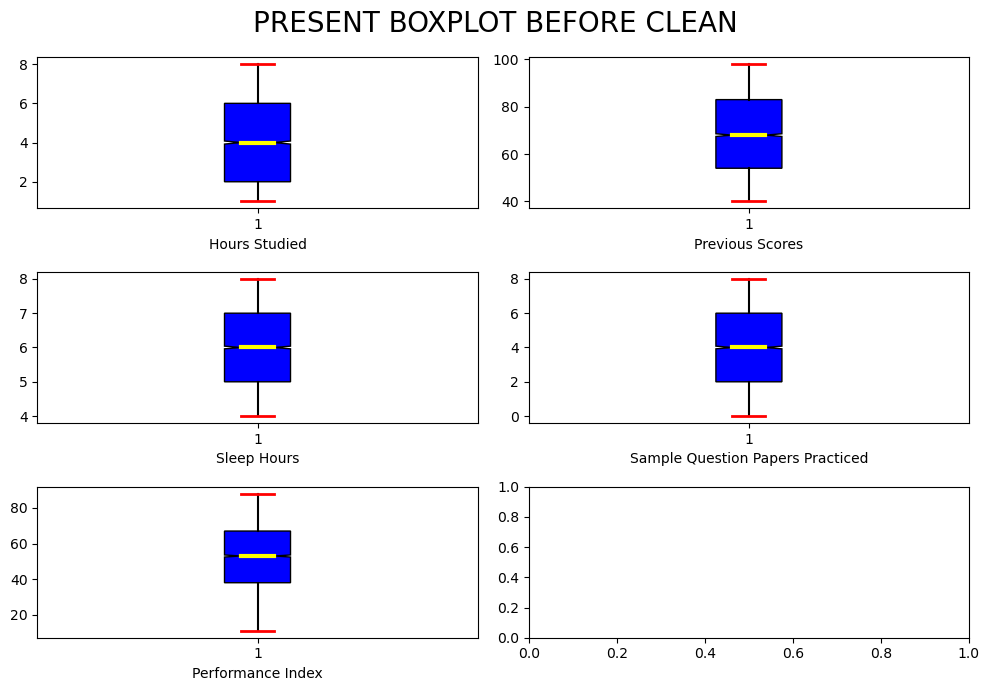

In [63]:
#Vẽ biểu đồ boxplot của các cột
fig, ax = plt.subplots(3, 2, figsize = (10, 7))
bp1 = ax[0, 0].boxplot(data_clean["Hours Studied"], patch_artist = True, notch = True, vert = 1)
bp2 = ax[0, 1].boxplot(data_clean["Previous Scores"], patch_artist = True, notch = True, vert = 1)
bp3 = ax[1, 0].boxplot(data_clean["Sleep Hours"], patch_artist = True, notch = True, vert = 1)
bp4 = ax[1, 1].boxplot(data_clean["Sample Question Papers Practiced"], patch_artist = True, notch = True, vert = 1)
bp5 = ax[2, 0].boxplot(data_clean["Performance Index"], patch_artist = True, notch = True, vert = 1)
colors = ["blue"]
b = [bp1, bp2, bp3, bp4, bp5]
for i in b:
    for patch, color in zip(i["boxes"], colors):
        patch.set_facecolor(color)

for i in b:
    for whisker in i["whiskers"]:
        whisker.set(color = "black", linewidth = 1.5)

for i in b:
    for cap in i["caps"]:
        cap.set(color = "red", linewidth = 2)

for i in b:
    for median in i["medians"]:
        median.set(color = "yellow", linewidth = 3)

ax[0, 0].set_xlabel("Hours Studied")
ax[0, 1].set_xlabel("Previous Scores")
ax[1, 0].set_xlabel("Sleep Hours")
ax[1, 1].set_xlabel("Sample Question Papers Practiced")
ax[2, 0].set_xlabel("Performance Index")
fig.suptitle("PRESENT BOXPLOT BEFORE CLEAN", fontsize = 20)
plt.tight_layout()
plt.show()

2.Encode Data

In [64]:
data_encode = data_clean.copy()

In [65]:
#Tìm các phần tử là duy nhất của các cột fuel_type, seller_type, transmission(là các cột cần mã hóa về dạng số)
lst_unique = []
lst_column_encoded = ["Extracurricular Activities"]
for i in lst_column_encoded:
    lst_unique.append(data_encode[i].unique().tolist())
lst_unique

[['No', 'Yes']]

In [66]:
#Tiến hành mã hóa các cột
data_encode["Extracurricular Activities"] = [0 if i == "No" else 1 for i in data_encode["Extracurricular Activities"]]
data_encode

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
6,7,73,1,5,6,63.0
...,...,...,...,...,...,...
9994,6,46,1,8,0,39.0
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0


**II.Đánh giá mức độ tương quan**

In [67]:
#Tính mức độ tương quan dữ liệu giữa các cột tron dữ liệu
cor_matrix = data_encode.corr()
cor_matrix

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.028867,-0.004378,-0.020370,0.010155,0.326818
Previous Scores,-0.028867,1.000000,0.007568,-0.002591,-0.000929,0.927532
Extracurricular Activities,-0.004378,0.007568,1.000000,-0.024407,0.014130,0.020985
Sleep Hours,-0.020370,-0.002591,-0.024407,1.000000,-0.003809,0.025229
Sample Question Papers Practiced,0.010155,-0.000929,0.014130,-0.003809,1.000000,0.030617
Performance Index,0.326818,0.927532,0.020985,0.025229,0.030617,1.000000


<Axes: >

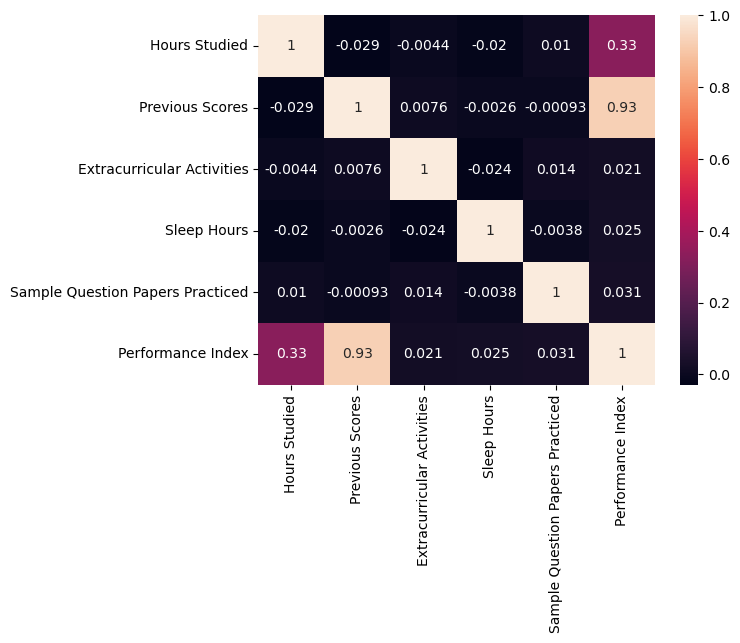

In [68]:
sns.heatmap(cor_matrix, annot = True)

Nhận xét:
+ Các cột "Hours Studied", "Previous Scores" có hệ số tương quan tương đối cao với cột selling_price
+ Các cột "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced" có hệ số tương quan thấp, cần phải loại bỏ

**III.Linear Regression**

In [69]:
data_linear_regression = data_encode.copy()
data_linear_regression

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
6,7,73,1,5,6,63.0
...,...,...,...,...,...,...
9994,6,46,1,8,0,39.0
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0


In [70]:
X = data_linear_regression[["Previous Scores", "Hours Studied"]].to_numpy()
Y = data_linear_regression["Performance Index"].to_numpy()


In [71]:
#Tạo hàm phân tách dữ liệu thành 2 phần là tập train và tập test
def data_train_test_split(data1, data2, train_size):
    x_train_size = int(np.ceil(train_size * len(data1)))
    y_train_size = int(np.ceil(train_size * len(data2)))
    x_train = data1[0:x_train_size]
    x_test = data1[x_train_size:len(data1)]
    y_train = np.array([data2[0:y_train_size]])
    y_test = np.array([data2[y_train_size:len(data2)]])
    return x_train, y_train, x_test, y_test

In [72]:
#Tạo hàm tính toán hệ số w
def linear_regression(x_arr, y_label):
    arr_ones = np.ones((x_arr.shape[0], 1))
    xbar = np.hstack((arr_ones, x_arr))
    y_arr = y_label.T
    A = np.dot(xbar.T, xbar)
    B = np.dot(xbar.T, y_arr)
    w = np.dot(np.linalg.pinv(A), B)
    return w

In [73]:
#Tạo hàm dự đoán cho 1 tập dữ liệu bất kỳ
def predict_regression(x_arr_test, w_coffecient):
    arr_ones = np.ones((x_arr_test.shape[0], 1))
    xbar_test = np.hstack((arr_ones, x_arr_test))
    y_predict = np.dot(xbar_test, w_coffecient)
    return y_predict

In [74]:
x_train, y_train, x_test, y_test = data_train_test_split(X, Y, 0.8)
w = linear_regression(x_train, y_train)
print("Hệ số w cần tìm:")
for i in range(len(w)):
    print("w" + str(i) + " = " + str(w[i][0]))

Hệ số w cần tìm:
w0 = -29.757815340455153
w1 = 1.014860955070776
w2 = 2.823895321870573


In [75]:
ytest_pred = predict_regression(x_test, w)
ytest_pred

array([[78.302355  ],
       [83.59734732],
       [19.74968391],
       ...,
       [54.96055304],
       [71.41901586],
       [65.10916259]])

In [76]:
ytest_predT = ytest_pred.T
lst_ytest_ytestpred = []
for i in range(len(ytest_predT[0])):
    lst_ytest_ytestpred.append([ytest_predT[0][i], y_test[0][i]])
lst_ytest_ytestpred.sort(key = lambda x: x[0])
lst_ytestpred = [lst_ytest_ytestpred[i][0] for i in range(len(lst_ytest_ytestpred))]
lst_ytest = [lst_ytest_ytestpred[i][1] for i in range(len(lst_ytest_ytestpred))]
lst_unit = [i for i in range(len(ytest_pred))]


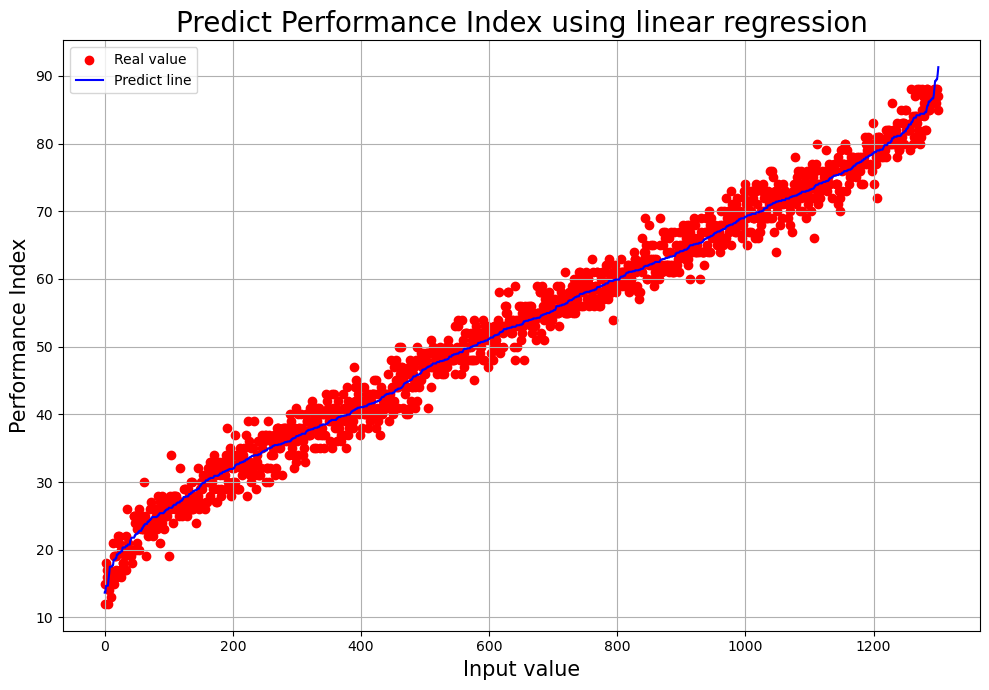

In [77]:
plt.figure(figsize = (10, 7))
plt.scatter(lst_unit, lst_ytest, color = "red", label = "Real value")
plt.plot(lst_unit, lst_ytestpred, color = "blue", label = "Predict line")
plt.title("Predict Performance Index using linear regression", fontsize = 20)
plt.ylabel("Performance Index", fontsize = 15)
plt.xlabel("Input value", fontsize = 15)
plt.grid()
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

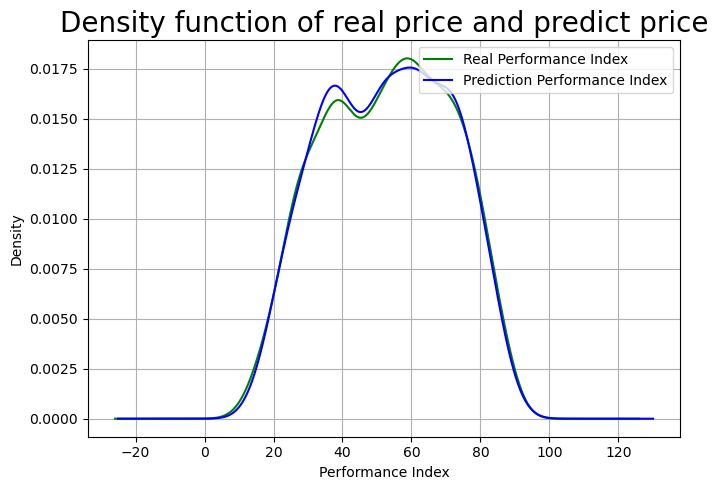

In [78]:
seri_real = pd.Series(y_test[0])
seri_predict = pd.Series(ytest_predT[0])
plt.figure(figsize = (7, 5))
seri_real.plot.density(color = "green")
seri_predict.plot.density(color = "blue")
plt.xlabel("Performance Index")
plt.title("Density function of real price and predict price", fontsize = 20)
plt.legend(["Real Performance Index", "Prediction Performance Index"], loc = "upper right")
plt.grid()
plt.tight_layout()
plt.show()


4.Dự đoán cho x_train

In [79]:
ytrain_pred = predict_regression(x_train, w)

In [80]:
ytrain_predT = ytrain_pred.T
lst_ytrain_ytrainpred = []
for i in range(len(ytrain_predT[0])):
    lst_ytrain_ytrainpred.append([ytrain_predT[0][i], y_train[0][i]])
lst_ytrain_ytrainpred.sort(key = lambda x: x[0])
lst_ytrainpred = [lst_ytrain_ytrainpred[i][0] for i in range(len(lst_ytrain_ytrainpred))]
lst_ytrain = [lst_ytrain_ytrainpred[i][1] for i in range(len(lst_ytrain_ytrainpred))]
lst_unit_train = [i for i in range(len(ytrain_pred))]

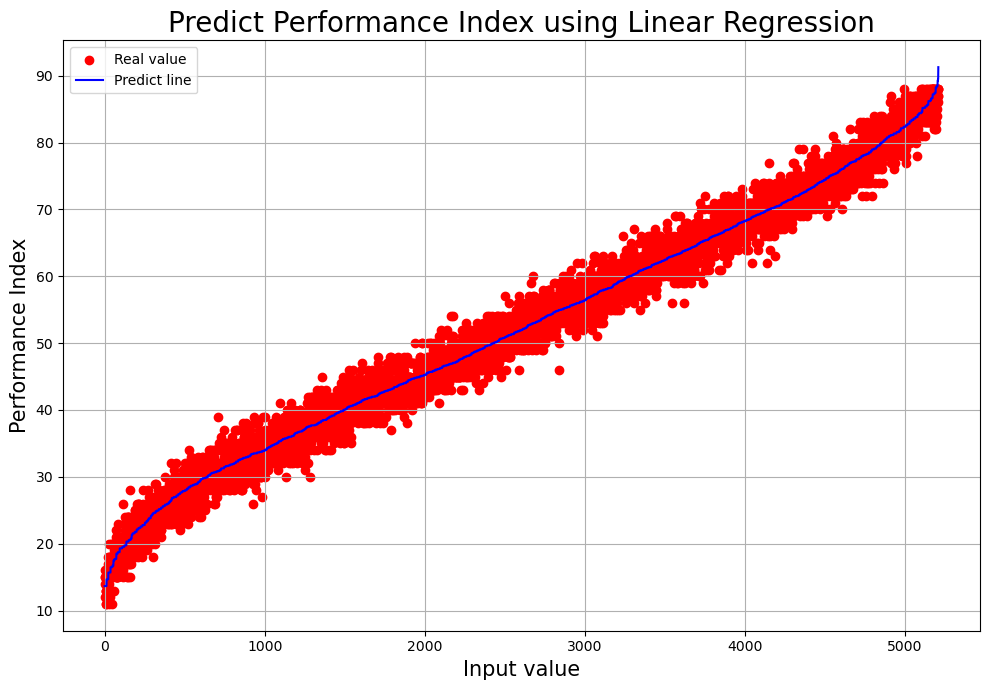

In [81]:
plt.figure(figsize = (10, 7))
plt.scatter(lst_unit_train, lst_ytrain, color = "red", label = "Real value")
plt.plot(lst_unit_train, lst_ytrainpred , color = "blue", label = "Predict line")
plt.title("Predict Performance Index using Linear Regression", fontsize = 20)
plt.ylabel("Performance Index", fontsize = 15)
plt.xlabel("Input value", fontsize = 15)
plt.grid()
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

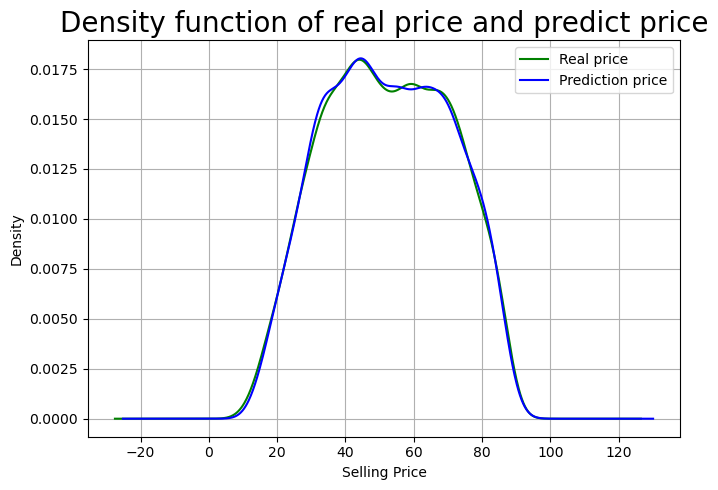

In [82]:
seri_real = pd.Series(y_train[0])
seri_predict = pd.Series(ytrain_predT[0])
plt.figure(figsize = (7, 5))
seri_real.plot.density(color = "green")
seri_predict.plot.density(color = "blue")
plt.xlabel("Selling Price")
plt.title("Density function of real price and predict price", fontsize = 20)
plt.legend(["Real price", "Prediction price"], loc = "upper right")
plt.grid()
plt.tight_layout()
plt.show()

5.Đánh giá sai số

In [83]:
#Tính sai số RMSE
def root_mean_square_error(y1, y2):
    y_error = y1 - y2
    y_error2 = y_error ** 2
    n = y_error2.shape[1]
    rmse = np.sqrt(y_error2.sum() / n)
    return rmse
    

In [84]:
#Tính sai số MSE
def mean_square_error(y1, y2):
    y_error = y1 - y2
    y_error2 = y_error ** 2
    n = y_error2.shape[1]
    mse = y_error2.sum() / n
    return mse

In [85]:
#Tính sai số MAE
def mean_absolute_error(y1, y2):
    y_error = y1 - y2
    for i in range(len(y_error[0])):
        if y_error[0][i] < 0:
            y_error[0][i] = y_error[0][i] * (-1)
    n = y_error.shape[1]
    mae = y_error.sum() / n
    return mae

*5.1.Đánh giá sai số cho tập test*

In [86]:
print("Root Mean Square Error(RMSE) of test data:", root_mean_square_error(y_test, ytest_predT))
print("Mean Square Error(MSE) of test data:", mean_square_error(y_test, ytest_predT))
print("Mean Absolute Error(MAE) of test data:", mean_absolute_error(y_test, ytest_predT))

Root Mean Square Error(RMSE) of test data: 2.2289314506529685
Mean Square Error(MSE) of test data: 4.968135411709946
Mean Absolute Error(MAE) of test data: 1.7521862121064031


*5.2.Đánh giá sai số cho tập train*

In [87]:
print("Root Mean Square Error(RMSE) of train data:", root_mean_square_error(y_train, ytrain_predT))
print("Mean Square Error(MSE) of train data:", mean_square_error(y_train, ytrain_predT))
print("Mean Absolute Error(MAE) of train data:", mean_absolute_error(y_train, ytrain_predT))

Root Mean Square Error(RMSE) of train data: 2.195224762898564
Mean Square Error(MSE) of train data: 4.819011759643057
Mean Absolute Error(MAE) of train data: 1.7437606418574119
